# Neural Networks baseline

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train_pd = pd.read_csv("train_2022.csv")
train_pd.head()

,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,145506,1,0,0,1,0,0,0,The rare liquor leakage syndrome with cranial ...
1,145506,2,0,0,1,0,0,0,This does not occur after a suboccipital punct...
2,145506,3,1,0,0,0,0,0,A report is given on three cases with differen...
3,145506,4,0,0,0,1,0,0,The prognosis of the eye-muscle paresis is good.
4,145506,5,0,0,0,1,0,0,Restitutio ad integrum resulted.


In [3]:
labels = ['population','intervention','background','outcome','study design','other']
label_counts = []
for l in labels:
    counts = train_pd[l].sum()
    label_counts.append(counts)
print(label_counts)

[584, 501, 1777, 3192, 167, 2424]


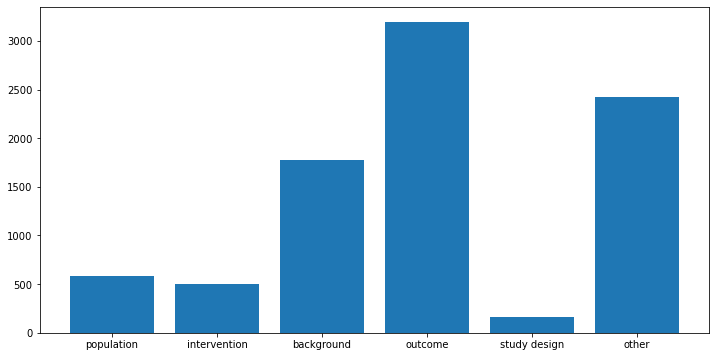

In [4]:
plt.figure(figsize=(12,6))
plt.bar(range(6), label_counts)
plt.xticks(range(6), labels)
plt.show()

In [5]:
n=len(train_pd)
n

8216

## Neural Networks

The following code trains a simple neural network that uses an output layer with a sigmoid activation function. 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras import models, layers

labels = ['population','intervention','background','outcome','study design','other']
nb = dict()

tfidf = TfidfVectorizer(input='contents', max_features=10000)
train_tfidf = tfidf.fit_transform(train_pd['Text']).toarray()

simple_nn = models.Sequential()
simple_nn.add(layers.Dense(6, activation='sigmoid', input_shape=(len(tfidf.get_feature_names()),)))
simple_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 60006     
Total params: 60,006
Trainable params: 60,006
Non-trainable params: 0
_________________________________________________________________


In [7]:
simple_nn.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [8]:
from random import shuffle
import numpy as np
history=simple_nn.fit(train_tfidf,
                      np.array(train_pd[labels]),
                      epochs=70,
                      batch_size=32,
                      validation_split=0.2)

Epoch 1/70
206/206 [==============================] - 1s 5ms/step - loss: 0.6247 - accuracy: 0.5145 - val_loss: 0.5716 - val_accuracy: 0.5426
Epoch 2/70
206/206 [==============================] - 1s 4ms/step - loss: 0.5213 - accuracy: 0.5288 - val_loss: 0.4905 - val_accuracy: 0.5444
Epoch 3/70
206/206 [==============================] - 1s 4ms/step - loss: 0.4513 - accuracy: 0.5318 - val_loss: 0.4351 - val_accuracy: 0.5474
Epoch 4/70
206/206 [==============================] - 1s 4ms/step - loss: 0.4050 - accuracy: 0.5393 - val_loss: 0.3978 - val_accuracy: 0.5560
Epoch 5/70
206/206 [==============================] - 1s 4ms/step - loss: 0.3740 - accuracy: 0.5482 - val_loss: 0.3724 - val_accuracy: 0.5706
Epoch 6/70
206/206 [==============================] - 1s 4ms/step - loss: 0.3524 - accuracy: 0.5659 - val_loss: 0.3546 - val_accuracy: 0.5773
Epoch 7/70
206/206 [==============================] - 1s 5ms/step - loss: 0.3369 - accuracy: 0.5844 - val_loss: 0.3419 - val_accuracy: 0.5864
Epoch 

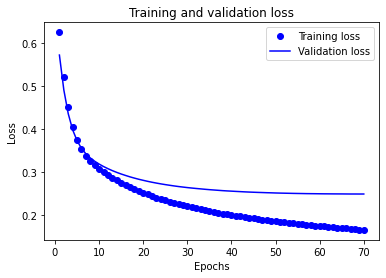

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The following code applies the Naive Bayes models to the test data, and saves the result in a CSV file for submission.

In [10]:
test_pd = pd.read_csv("val_2022.csv")
test_pd.head()

,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,2545507,1,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2545507,2,NaN,NaN,NaN,NaN,NaN,NaN,Field electrical stimulation elicited an incre...
2,2545507,3,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2545507,4,NaN,NaN,NaN,NaN,NaN,NaN,"This efflux was: (a) reduced by clonidine, NA ..."
4,2545507,5,NaN,NaN,NaN,NaN,NaN,NaN,3


In [11]:
test_tfidf = tfidf.transform(test_pd['Text']).toarray()
test_probabilities = simple_nn.predict(test_tfidf)
test_pd[labels] = test_probabilities
test_pd.head()

,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,2545507,1,0.403326,0.509050,0.412126,0.340557,0.415137,0.831566,1
1,2545507,2,0.070197,0.078836,0.224854,0.487203,0.006018,0.045046,Field electrical stimulation elicited an incre...
2,2545507,3,0.403326,0.509050,0.412126,0.340557,0.415137,0.831566,2
3,2545507,4,0.039184,0.394099,0.117134,0.770846,0.000190,0.030499,"This efflux was: (a) reduced by clonidine, NA ..."
4,2545507,5,0.403326,0.509050,0.412126,0.340557,0.415137,0.831566,3


In [12]:
test_pd.to_csv('nn_val_2022_probabilities.csv', index=False)

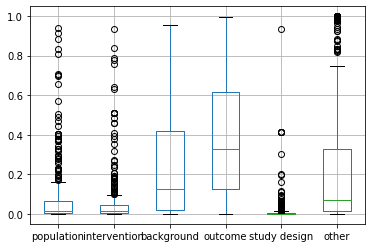

In [13]:
test_pd.boxplot(column=labels)